## Single Class Prediction
Following code is for the prediction of a single class of landmark points. Thus, when giving corrdinates of landmark poitns as input, only a single point from a specific class
is given for each of its corresponding images. This test was implemented to test the capability of CNN to predict for only a single class of landmarks as a sort of control to compare with the other tests, where the CNN is traiend to output muliple classes of points. 

## Import Statements and Prep

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install torch
!pip3 install torchvision
!pip3 install tqdm

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms, utils, datasets
from tqdm import tqdm
from torch.nn.parameter import Parameter
import pdb

In [ ]:
import os
import pandas as pd
from skimage import io, transform
import matplotlib.pyplot as plt
import PIL.Image as Image
from sklearn.model_selection import train_test_split

## Data Importation and Prepping (Resizing and Display)

In [ ]:
class ProjPointsDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Arguments:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        #self.landmarks_frame = pd.read_csv(csv_file)
        self.landmarks_frame = csv_file
        self.root_dir = root_dir
        self.transform = transform
        #self.landmarks_dict = {}
        #print("Landmarks_frame: ", self.landmarks_frame['id'])
        # for id, x_cord, y_cord in self.landmarks_frame.iterrows():
        #   self.landmarks_dict


    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        img_name = img_name + '.png'
        image = io.imread(img_name)
        #image = Image.open(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:3]
        ### Remember to subtract 1000 from y points as the origin reference is different
        #print("Landmarks: ", landmarks["y"])
        landmarks["y"] = 1000 - landmarks["y"]
        #print(landmarks)
        landmarks = np.array([landmarks], dtype=float).reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [ ]:
### Retrieve Data - Import only Class 1 points for this example

#train_data = ProjPointsProcessedDataset('/content/drive/MyDrive/landmarkTraining')
#val_data = ProjPointsProcessedDataset('/content/drive/MyDrive/landmarkTraining', train = False)
image_directory = '/content/drive/MyDrive/landmarkTraining'
landmarks_dir = '/content/drive/MyDrive/side-notchedLandmarks-only_class1.csv'

In [ ]:
landmarks_full  = pd.read_csv(landmarks_dir)
train_landmarks, test_landmarks = train_test_split(landmarks_full, test_size=0.2)

In [ ]:

pp_dataset = ProjPointsDataset(train_landmarks, image_directory)
pp_dataset[0]

{'image': array([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]], dtype=uint8),
 'landmarks': array([[613., 490.]

In [ ]:
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    print("Image type: ", type(image))
    plt.imshow(image)

    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated

In [ ]:
pp_dataset[0]

{'image': array([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]], dtype=uint8),
 'landmarks': array([[685., 469.]

0 (1000, 1000, 4) (1, 2)
Image type:  <class 'numpy.ndarray'>


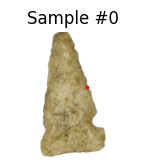

1 (1000, 1000, 4) (1, 2)
Image type:  <class 'numpy.ndarray'>


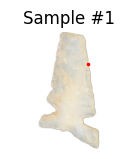

2 (1000, 1000, 4) (1, 2)
Image type:  <class 'numpy.ndarray'>


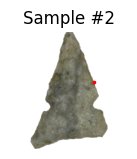

3 (1000, 1000, 4) (1, 2)
Image type:  <class 'numpy.ndarray'>


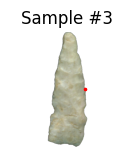

In [ ]:
fig = plt.figure()

for i, sample in enumerate(pp_dataset):
    print(i, sample['image'].shape, sample['landmarks'].shape)
    #print(i, sample['image'].size, sample['landmarks'].shape)
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 3:
        plt.show()
        break

In [ ]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h + 1)
        left = np.random.randint(0, w - new_w + 1)

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W

        image = image.transpose((2, 0, 1))
        ### Grab only first 3 input channels of image, as fourth channel is a "transparency" channel
        #print("Image shape: ", image[0:3].shape)
        return {'image': torch.from_numpy(image[0:3]),
                'landmarks': torch.from_numpy(landmarks)}

Image type:  <class 'numpy.ndarray'>


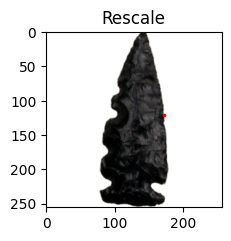

Image type:  <class 'numpy.ndarray'>


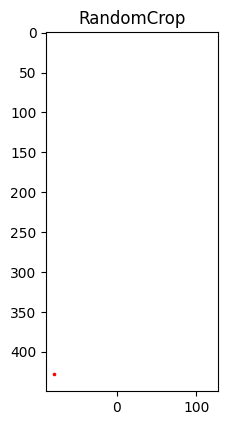

Image type:  <class 'numpy.ndarray'>


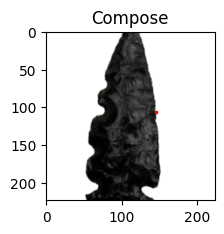

In [ ]:
scale = Rescale(256)
crop = RandomCrop(128)
composed = transforms.Compose([Rescale(256),
                               RandomCrop(224)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = pp_dataset[3]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_landmarks(**transformed_sample)

plt.show()

In [ ]:
transformed_dataset = ProjPointsDataset(csv_file=train_landmarks,
                                           root_dir=image_directory,
                                           transform=transforms.Compose([
                                               Rescale(256),
                                               RandomCrop(224),
                                               ToTensor()
                                           ]))

for i, sample in enumerate(transformed_dataset):
    print(i, sample['image'].size(), sample['landmarks'].size())

    if i == 3:
        break

0 torch.Size([3, 224, 224]) torch.Size([1, 2])
1 torch.Size([3, 224, 224]) torch.Size([1, 2])
2 torch.Size([3, 224, 224]) torch.Size([1, 2])
3 torch.Size([3, 224, 224]) torch.Size([1, 2])


In [ ]:
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=0)


# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
            sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    grid_border_size = 2

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    for i in range(batch_size):
        plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size + (i + 1) * grid_border_size,
                    landmarks_batch[i, :, 1].numpy() + grid_border_size,
                    s=10, marker='.', c='r')

        plt.title('Batch from dataloader')

# if you are using Windows, uncomment the next line and indent the for loop.
# you might need to go back and change ``num_workers`` to 0.

# if __name__ == '__main__':
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['landmarks'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

0 torch.Size([4, 3, 224, 224]) torch.Size([4, 1, 2])
1 torch.Size([4, 3, 224, 224]) torch.Size([4, 1, 2])
2 torch.Size([4, 3, 224, 224]) torch.Size([4, 1, 2])


## CNN for Single Class Predicition

In [ ]:
class ConvNetwork(nn.Module):
  def __init__(self, dataset):
    super(ConvNetwork, self).__init__()
    x, y = dataset[0]
    c = 3
    h = 256
    w = 256
    #output = 10
###
    self.net = nn.Sequential(
        nn.Conv2d(c, 36, (11, 11)),
        #nn.ReLU(),
        # ##nn.Softmax(dim=1),
        nn.Conv2d(36, 64, (21, 21)),
        #nn.ReLU(),
        nn.MaxPool2d(2, stride =  1),
        nn.Conv2d(64, 128, (101, 101)),
        # #nn.Linear(24, output)
        #nn.LeakyReLU(0.1),
        nn.Conv2d(128, 64, (101, 101)),
        #nn.ReLU(),
        nn.Conv2d(64, 36, (24, 24)),
        nn.MaxPool2d(2, stride =  1)
    )

    self.linear_end = nn.Sequential(
        nn.Linear(36, 100),
        nn.Linear(100,50),
        nn.Linear(50,10),
        nn.Linear(10,2)
    )
        ### change shape of x

  def forward(self, x):
    #return self.net(x).squeeze(2).squeeze(2)
    x_1 = self.net(x)
    x_1 = x_1.view(x_1.size(0),-1)
    # print("x_1: ", x_1.size())
    x_2 = self.linear_end(x_1)
    return x_2


## Training of Model

In [ ]:
### Download datasets
train_dataset = ProjPointsDataset(csv_file=train_landmarks,
                                           root_dir=image_directory,
                                           transform=transforms.Compose([
                                               Rescale(256),
                                               #RandomCrop(224),
                                               ToTensor()
                                           ]))
val_dataset = ProjPointsDataset(csv_file= test_landmarks,
                                           root_dir=image_directory,
                                           transform=transforms.Compose([
                                               Rescale(256),
                                               #RandomCrop(224),
                                               ToTensor()
                                           ]))

In [ ]:
###Goal: Return two points, representing a single class of points

class ConvNetwork(nn.Module):
  def __init__(self, dataset):
    super(ConvNetwork, self).__init__()
    rescale_factor = 256
    x, y = dataset[0]
    c = 3
    h = rescale_factor
    w = rescale_factor
    #output = 10
###
    self.net = nn.Sequential(
        nn.Conv2d(c, 36, (11, 11)),
        nn.ReLU(),
        # ##nn.Softmax(dim=1),
        nn.Conv2d(36, 64, (21, 21)),
        nn.ReLU(),
        nn.MaxPool2d(2, stride =  1),
        nn.Conv2d(64, 128, (101, 101)),
        # #nn.Linear(24, output)
        nn.LeakyReLU(0.1),
        nn.Conv2d(128, 64, (101, 101)),
        nn.ReLU(),
        nn.Conv2d(64, 36, (24, 24)),
        nn.ReLU(),
        nn.MaxPool2d(2, stride =  1)
    )

    self.linear_end = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,2)
    )
        ### change shape of x

  def forward(self, x):
    #return self.net(x).squeeze(2).squeeze(2)
    x_1 = self.net(x)
    x_1 = x_1.view(x_1.size(0),-1)
    #print("x_1: ", x_1.size())
    x_2 = self.linear_end(x_1)
    return x_2





In [ ]:
def accuracy(predicted, actual):
  threshhold = .2
  diff = torch.sub(actual,predicted,alpha=1,out=None)
  #print(diff)

  a = torch.norm(diff, p=float('inf'),dim=1)
  #print("a: ", a)
  accur_score = a < threshhold
  #print(accur_score)
  return torch.mean(accur_score.float())


In [ ]:
def euclidean_loss(predicted, actual):
    print("Predicted: ", predicted)
    print("Actual: ", actual)
    diff = torch.sub(actual,predicted)
    #print(diff)
    squared = torch.square(diff)
    ##print(squared)
    sum = torch.sum(squared)
    return torch.sqrt(sum)

In [ ]:
a = torch.tensor([2, 3])
b = torch.tensor([4, 5])
euclidean_loss(a,b)


tensor([4, 4])


In [ ]:
import gc

def training():

    gc.collect()
    epochs = 3
    rescale = 256
    lr = .005
    val_every = 10

    batch_size = 10
    device = torch.device('cuda:0')
    model = ConvNetwork(train_dataset)
    model = model.cuda()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    objective = nn.MSELoss()

    train_dataloader = DataLoader(train_dataset, batch_size=batch_size,
                            shuffle=True, num_workers=5)

    val_dataloader = DataLoader(val_dataset, batch_size=batch_size,
                            shuffle=True, num_workers=0)
    losses = []
    validations = []
    accuracies = []
    val_accuracies = []
    #batch = 0

    for epoch in range(epochs):
      loop = tqdm(total=len(train_dataloader), position=0, leave=False)
      for item in train_dataloader:
        ### for garbage collection

        x = item['image']
        x = x.float()
        x = x/rescale
        #print("Type: ", x.dtype)
        y_truth = item['landmarks']
        #print("Type: ",y_truth.dtype)
        y_truth = y_truth.float()
        y_truth = y_truth/rescale


        x, y_truth = x.to(device), y_truth.to(device)
        #print ("Y_truth: ", y_truth)
        optimizer.zero_grad()
        #print(x.size())
        y_hat = model(x)
        y_hat = y_hat.float()
        #print(y_hat)

        # print(y_hat.size())
        # print(y_truth.size())
        y_truth = y_truth.squeeze(1)
        #y_truth = torch.cat((y_truth), 0)
        #print("y_truth: ", y_truth)

        # print("y_truth: ", y_truth.size())
        # print("batch_size: ", y_truth.size(0))
        curr_batch = y_truth.size(0)
        # print("y_hat: ", y_hat.size())
        #y_truth = y_truth.view((curr_batch,4))
        #print("y_truth: ", y_truth.size())

        # print("y_truth: ", y_truth)
        # print("y_hat: ", y_hat)
        loss = objective(y_hat, y_truth)

        output_accuracy = accuracy(y_hat, y_truth)
        accuracies.append(output_accuracy.item())

        loss.backward()
        losses.append(loss.item())

        loop.set_description('epoch:{}, loss:{:.4f}, accuracy:{:.3f}'.format(epoch, loss.item(), output_accuracy.item()))
        loop.update(1)

        optimizer.step()

        ##batch += 1
        ###if batch % 40 == 0:

        del loss
        del x, y_truth
        del y_hat
        torch.cuda.empty_cache()
      #### End inner train loop
      ### for every epoch do val collection
      with torch.no_grad():
        vals = []
        acc_vals = []
        for item in val_dataloader:
          x = item['image']
          x = x.float()
          x = x/rescale

          y = item['landmarks']
          y = y.float()
          y = y/rescale
          y = y.squeeze(1)
          curr_val_batch = y.size(0)
          #y = y.view((curr_val_batch,4))

          val = np.mean([objective(model(x.cuda()), y.cuda()).item()])
          #print("Val: ", val)
          vals.append(val)
          #print(validations)

          val_acc = np.mean([accuracy(model(x.cuda()), y.cuda()).item()])
          #print("Val_acc: ", val_acc)
          acc_vals.append(val_acc)
          #print(val_accuracies)
          del x,y
          torch.cuda.empty_cache()
        validations.append((len(losses),  np.mean(vals)))
        #print(validations)
        val_accuracies.append((len(accuracies), np.mean(acc_vals)))
        #print(val_accuracies)

    return losses, validations, accuracies, val_accuracies

In [ ]:
losses_returned, val_returned, accuracies_returned, val_accuracies_returned = training()

  0%|          | 0/43 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
epoch:0, loss:0.0120, accuracy:0.750: 100%|██████████| 43/43 [16:38<00:00, 19.08s/it]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
epoch:2, loss:0.0069, accuracy:1.000: 100%|██████████| 43/43 [16:39<00:00, 19.09s/it]

## Loss Curves for Single Class Prediction

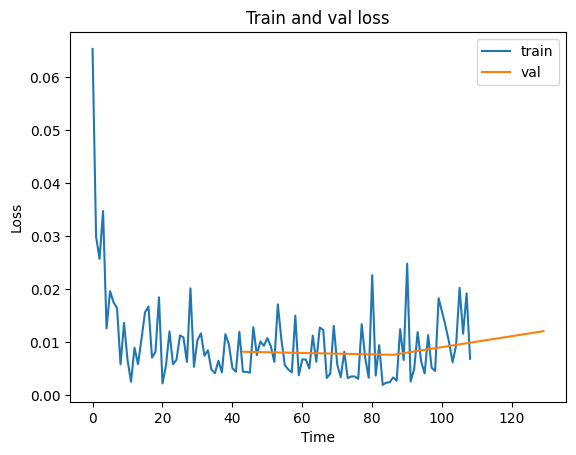

In [ ]:
a,b = zip(*val_returned)
plt.title("Train and val loss")
plt.plot(losses_returned[20:], label='train')
plt.plot(a,b, label='val')
plt.xlabel("Time")
plt.ylabel("Loss")
plt.legend()
plt.show()

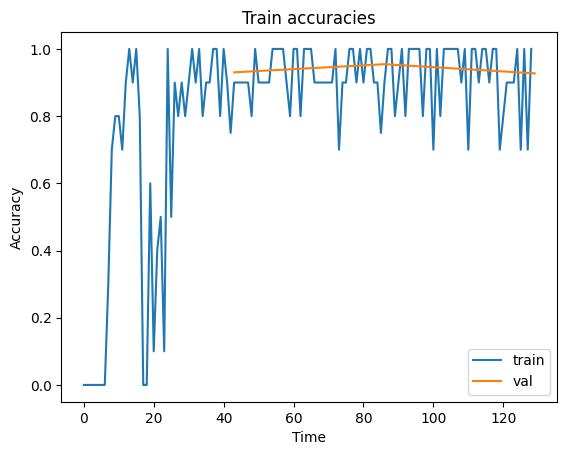

In [ ]:
a,b = zip(*val_accuracies_returned)
plt.title("Train accuracies")
plt.plot((accuracies_returned), label='train')
plt.plot(a,b, label='val')
plt.xlabel("Time")
plt.ylabel("Accuracy")
plt.legend()
plt.show()